# Advertising Budget
### (Regression Problem)

*To understand how mediums like TV, Radio & Newspaper influence Sales* 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
ad = pd.read_csv(r'C:\Users\Acer\Downloads\Study\Data Sets\Advertising Budget and Sales.csv', index_col=[0])
ad.head()
# https://github.com/Sahilkashyap200/Advertising...Linear-Regression/blob/main/Linear%20Regression%20(Advertising%20Data).ipynb
# https://www.kaggle.com/zebashaikh/linear-regression-on-advertising-dataset
# https://www.kaggle.com/anubhavtyagi1212/advertising-data-linear-regression-analysis
# https://www.kaggle.com/abhishekmungoli/linear-regression-advertising-dataset

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [35]:
ad.info()
ad.describe().round()
ad.shape
ad.columns
ad.dtypes
ad.values
ad.size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


800

In [36]:
ad.isna().sum() # Check for null values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [37]:
ad.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:xlabel='sales', ylabel='Density'>

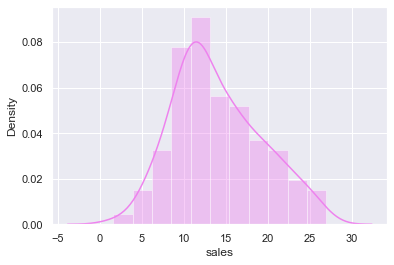

In [38]:
sns.distplot(ad['sales'], color='violet', hist=True, rug=False)

#### *Sales data seems to follow Gaussian/Normal Distribution*

<AxesSubplot:>

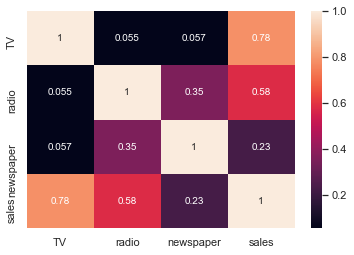

In [39]:
sns.heatmap(ad.corr(), annot=True)

##### *The heatmap shows that 'sales' has a strong correlation with 'TV' relative to other features*

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(close=None, block=None)>

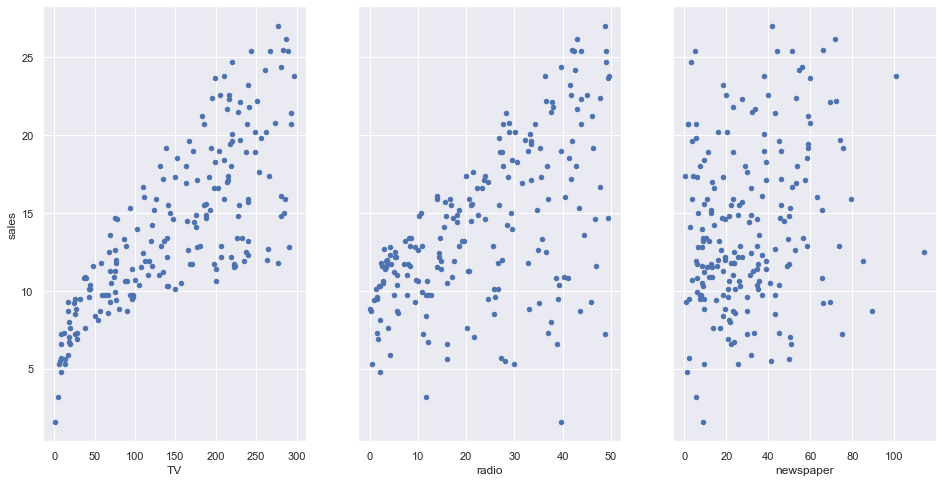

In [40]:
fig,axs= plt.subplots(1,3,sharey=True) # sharey - share same y axis across the plot
ad.plot(kind="scatter",x='TV',y='sales',ax=axs[0],figsize=(16,8))
ad.plot(kind="scatter",x='radio',y='sales',ax=axs[1],figsize=(16,8))
ad.plot(kind="scatter",x='newspaper',y='sales',ax=axs[2],figsize=(16,8))
plt.show

##### *There seems to be a few outliers in the newspaper plot*

<AxesSubplot:xlabel='TV'>

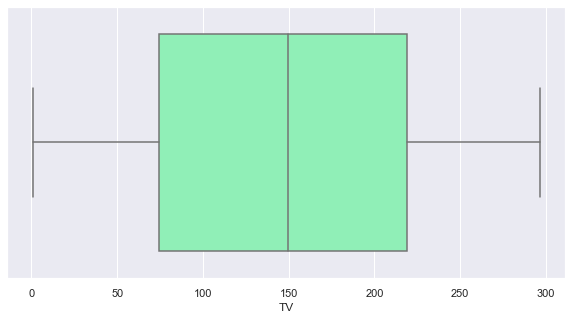

In [41]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
sns.boxplot(ad.TV, palette='rainbow')

<AxesSubplot:xlabel='radio'>

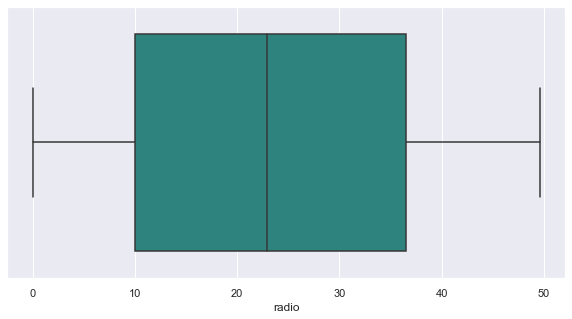

In [42]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
sns.boxplot(ad.radio,palette='viridis')

<AxesSubplot:xlabel='newspaper'>

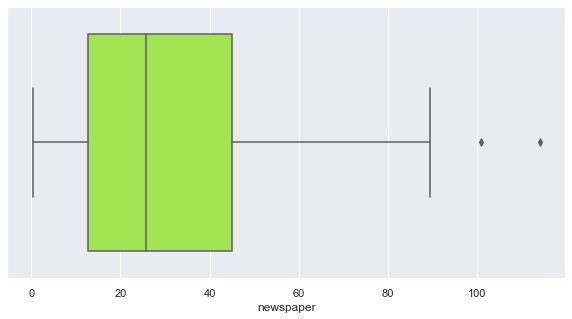

In [43]:
plt.rcParams["figure.figsize"] = [10.00, 5.00]
sns.boxplot(ad.newspaper, palette='turbo')

##### *Using boxplots we can confirm that there are indeed outliers in newspaper feature which need to be removed or they could affect the model prediction process*

### Combined regression plots of 'Sales' vs 'TV', 'radio' & 'newspaper'

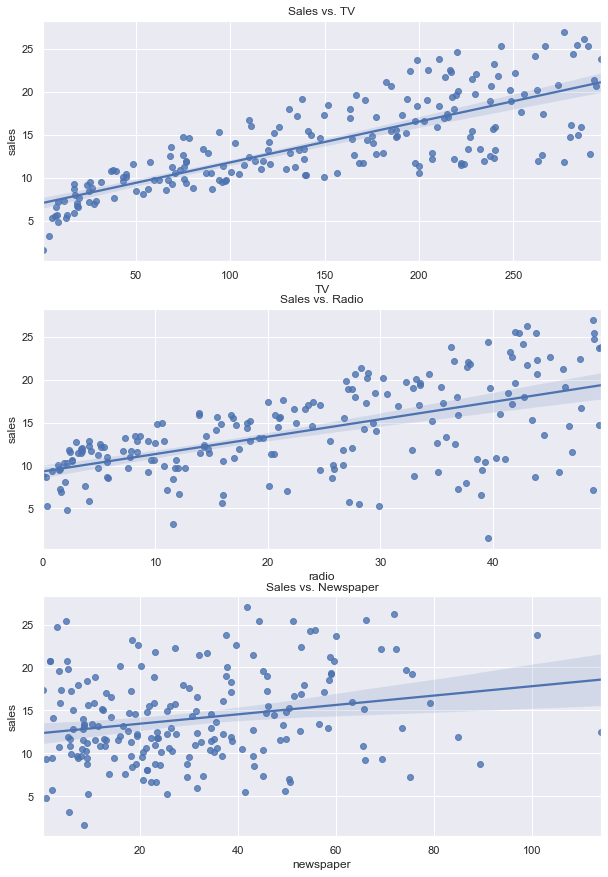

In [44]:
figure, axes = plt.subplots(3, 1, sharey=True,figsize=(10, 15))
sns.set(style="darkgrid")
sns.regplot(data=ad, x='TV', y='sales', ax=axes[0]).set(title='Sales vs. TV')
sns.regplot(data=ad, x='radio', y='sales', ax=axes[1]).set(title='Sales vs. Radio')
sns.regplot(data=ad, x='newspaper', y='sales', ax=axes[2]).set(title='Sales vs. Newspaper')
plt.show()

In [45]:
# standard deviations of TV, radio & newspaper
np.std(ad.TV), np.std(ad.radio), np.std(ad.newspaper)

(85.63933175679269, 14.809645640595186, 21.724106057557353)

*Observations*
- *TV ads seem to have greater impact on sales with the steepest slope followed by Radio and Newspaper*
- *Spending on TV ads seems to have highest variance followed by Newspaper and Radio*

### Removing Outliers

In [46]:
Q1 = ad['newspaper'].quantile(0.25)
Q3 = ad['newspaper'].quantile(0.75)
IQR = Q3-Q1
print("Old Shape: ", ad.shape)
upper = Q3+1.5*IQR # Upper bound
lower = Q1-1.5*IQR # Lower bound
ad=ad[~((ad['newspaper'] <= lower) | (ad['newspaper'] >= upper))]
print("New Shape: ", ad.shape)

Old Shape:  (200, 4)
New Shape:  (198, 4)


<AxesSubplot:xlabel='newspaper'>

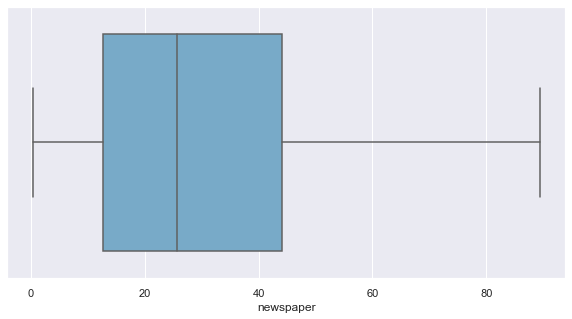

In [47]:
# Checking for removal of outliers
sns.boxplot(ad.newspaper, palette='Blues')

##### *Newspaper feature has been cleared of outliers*

### Skewness in dataset

In [48]:
ad.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

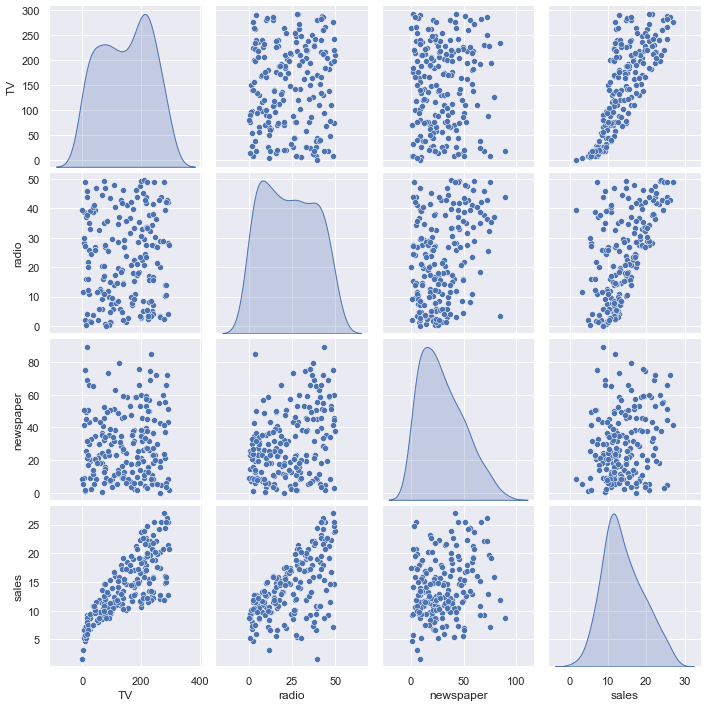

In [49]:
sns.pairplot(ad,x_vars=['TV','radio','newspaper','sales'],y_vars=['TV','radio','newspaper','sales'],diag_kind='kde')
plt.show()

##### *Amongst all features it is clear that newspaper has a prononunced(positive) skew. We therefore apply sqrt to reduce it.*

In [50]:
# Applying square root to normalize 'newspaper' feature.
ad['newspaper']=np.sqrt(ad['newspaper'])

In [51]:
# import skew from scipy.stats
from scipy.stats import skew
skew(ad['newspaper'])

-0.040340871727186554

In [52]:
# Check to see skewness
ad.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

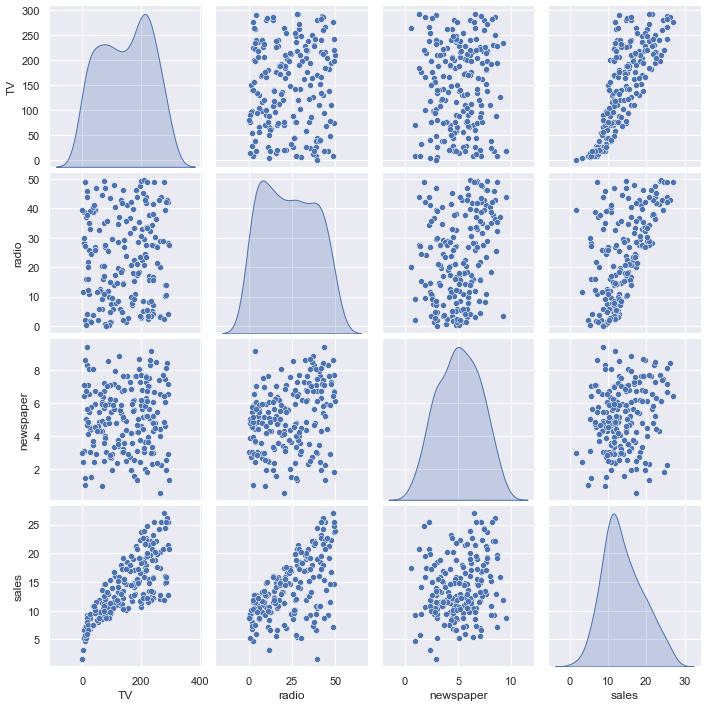

In [53]:
# verifying graphically
sns.pairplot(ad,x_vars=['TV','radio','newspaper','sales'],y_vars=['TV','radio','newspaper','sales'],diag_kind='kde')
plt.show()

##### *Using pairplot we can see that newspaper is now normally distributed.*

In [54]:
# Splitting the data for x features
x=ad[['TV','radio','newspaper']] # x variable is created as a model to train
x.head()
# x = ad.iloc[:,[0,1,2]].values
# x

,TV,radio,newspaper
1,230.1,37.8,8.318654
2,44.5,39.3,6.715653
3,17.2,45.9,8.324662
4,151.5,41.3,7.648529
5,180.8,10.8,7.641989


In [55]:
# Splitting the data for y target
y=ad[['sales']] # y is created as the target variable, to be used to compare against x
y.head()
# y = ad.iloc[:,[3]].values
# y

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [56]:
print(x.shape)
print(y.shape)

(198, 3)
(198, 1)


## Model Testing

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(158, 3)
(158, 1)
(40, 3)
(40, 1)


### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
linereg=LinearRegression()
linereg.fit(X_train,y_train)

LinearRegression()

In [60]:
linereg.score(X_train, y_train)

0.9124839582885386

In [61]:
linereg.score(X_test, y_test)

0.8252542820487998

In [62]:
y_predict = linereg.predict(X_test)
y_predict

array([[10.05678823],
       [ 5.53085232],
       [16.96971091],
       [14.16915841],
       [ 9.13210463],
       [15.41525653],
       [ 6.61941765],
       [ 8.66416973],
       [10.85730349],
       [18.64927391],
       [ 9.79231564],
       [15.34747738],
       [ 6.50374278],
       [19.06394167],
       [ 9.86360803],
       [ 9.68977996],
       [14.02253679],
       [17.18633556],
       [21.12732676],
       [11.93836113],
       [ 3.56747736],
       [16.30989321],
       [11.97164564],
       [ 9.48383474],
       [17.39873045],
       [15.1273564 ],
       [12.37851267],
       [17.47756203],
       [24.09021196],
       [10.78582867],
       [ 9.62788956],
       [22.05187182],
       [15.87364146],
       [11.13185438],
       [21.38184774],
       [15.16783038],
       [12.53390093],
       [ 4.43747282],
       [15.00100941],
       [18.839725  ]])

In [63]:
print(linereg.intercept_)
print(linereg.coef_)

[3.2076026]
[[ 0.04482975  0.19688873 -0.06050829]]


In [64]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

2.244524837134727
